<a href="https://colab.research.google.com/github/rr4333-create/MLDA-SUBMISSION-/blob/main/OBSERVATION_PROGRAMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Create dataset
data = pd.DataFrame({
    "Size (sqft)": [1200, 1500, 1000, 1800, 2200],
    "Rooms": [3, 4, 2, 4, 5],
    "Age (years)": [10, 5, 20, 8, 2],
    "Price (INR)": [5000000, 6500000, 4000000, 8500000, 12000000],
    "Location": ["City Center", "Suburb", "City Center", "Suburb", "Outskirts"]
})

# Data cleaning
for col in ['Size (sqft)', 'Age (years)', 'Price (INR)']:
    data[col] = data[col].replace(',', '', regex=True).astype(float)

# Numeric and categorical preprocessing
num_features = ['Size (sqft)', 'Rooms', 'Age (years)', 'Price (INR)']
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_features = ['Location']
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Input preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, ['Size (sqft)', 'Rooms', 'Age (years)']),
        ("cat", cat_transformer, cat_features)
    ]
)

# Fit-transform input data
data_preprocessed_array = preprocessor.fit_transform(data)

# Build DataFrame with column names
cat_cols = preprocessor.named_transformers_["cat"]["onehot"].get_feature_names_out(cat_features)
all_cols = ['Size (sqft)', 'Rooms', 'Age (years)'] + list(cat_cols)
data_preprocessed = pd.DataFrame(data_preprocessed_array, columns=all_cols)

# Output preprocessing (target)
preprocessor_Out = ColumnTransformer(
    transformers=[("num", num_transformer, ['Price (INR)'])]
)
data_preprocessed_Out_array = preprocessor_Out.fit_transform(data)
data_preprocessed_Out = pd.DataFrame(data_preprocessed_Out_array, columns=["Price (INR)"])

# Feature Engineering
data_preprocessed["Price_per_sqft"] = data['Price (INR)'] / data['Size (sqft)']

# Data Splitting
X = data_preprocessed
y = data_preprocessed_Out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())
print(y_train.head())

   Size (sqft)     Rooms  Age (years)  Location_City Center  \
4     1.545367  1.372813    -1.141574                   0.0   
2    -1.264391 -1.568929     1.793902                   1.0   
0    -0.796098 -0.588348     0.163082                   1.0   
3     0.608781  0.392232    -0.163082                   0.0   

   Location_Outskirts  Location_Suburb  Price_per_sqft  
4                 1.0              0.0     5454.545455  
2                 0.0              0.0     4000.000000  
0                 0.0              0.0     4166.666667  
3                 0.0              1.0     4722.222222  
   Price (INR)
4     1.690728
2    -1.127152
0    -0.774917
3     0.457905


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = {
    'x': [2, 4, 6, 8, 10],
    'y': [5, 9, 13, 17, 21]
}
df = pd.DataFrame(data)

X = df[['x']]
Y = df[['y']]

model = LinearRegression()
model.fit(X,Y)

y_pred = model.predict(X)

print("Slope(m):", model.coef_[0])
print("Intercept(c):", model.intercept_)


Slope(m): [2.]
Intercept(c): [1.]


Slope(m): [1.9]
Intercept(c): [1.5]
   average_montly_hours  last_evaluation
0                   150             0.30
1                   160             0.45
2                   170             0.50
3                   180             0.65
4                   190             0.70
Slope(m): [0.00875]
Intercept(c): -0.9750000000000003


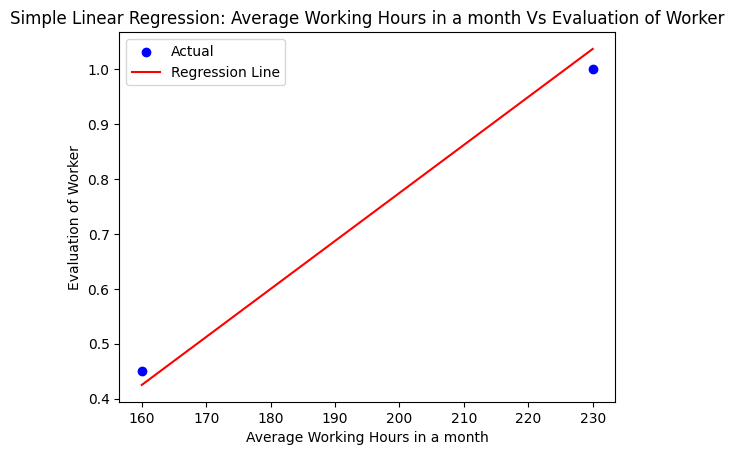

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


data = {
    'x': [1, 2, 3, 4, 5],
    'y': [3, 6, 7, 9, 11]
}
df = pd.DataFrame(data)

X = df[['x']]
Y = df[['y']]

model = LinearRegression()
model.fit(X, Y)

y_pred = model.predict(X)

print("Slope(m):", model.coef_[0])
print("Intercept(c):", model.intercept_)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = {
    "average_montly_hours": [150, 160, 170, 180, 190, 200, 210, 220, 230, 240],
    "last_evaluation":      [0.30, 0.45, 0.50, 0.65, 0.70, 0.80, 0.85, 0.95, 1.00, 1.10]
}
df = pd.DataFrame(data)
df.to_csv("Employee_Details.csv", index=False)


data = pd.read_csv("Employee_Details.csv")
print(data.head())

X = data[['average_montly_hours']]
y = data['last_evaluation']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Slope(m):", model.coef_)
print("Intercept(c):", model.intercept_)


plt.scatter(X_test, y_test, color='blue', label='Actual')


plt.plot(X_test, y_pred, color='red', label='Regression Line')


plt.xlabel('Average Working Hours in a month')
plt.ylabel('Evaluation of Worker')
plt.title('Simple Linear Regression: Average Working Hours in a month Vs Evaluation of Worker')
plt.legend()
plt.show()


In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load Wine dataset
X, y = datasets.load_wine(return_X_y=True)

# Define models
clf1 = DecisionTreeClassifier(random_state=42)

# Logistic Regression with scaling (fixes convergence warning)
clf2 = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Define K-Folds
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation scores
scores1 = cross_val_score(clf1, X, y, cv=k_folds)
scores2 = cross_val_score(clf2, X, y, cv=k_folds)

# Print results
print("Cross Validation Scores (Decision Tree): ", scores1)
print("Cross Validation Scores (Logistic Regression): ", scores2)
print("Average CV Score (Decision Tree): ", scores1.mean())
print("Average CV Score (Logistic Regression): ", scores2.mean())
print("Number of CV Scores used in Average (Decision Tree): ", len(scores1))
print("Number of CV Scores used in Average (Logistic Regression): ", len(scores2))


Cross Validation Scores (Decision Tree):  [0.88888889 1.         0.94444444 0.88888889 0.88888889 0.88888889
 0.94444444 0.77777778 1.         0.76470588]
Cross Validation Scores (Logistic Regression):  [1.         1.         0.94444444 1.         1.         1.
 1.         0.94444444 1.         1.        ]
Average CV Score (Decision Tree):  0.8986928104575164
Average CV Score (Logistic Regression):  0.9888888888888889
Number of CV Scores used in Average (Decision Tree):  10
Number of CV Scores used in Average (Logistic Regression):  10


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

data = pd.DataFrame({
    "satisfaction_level": [0.38, 0.80, 0.11, 0.72, 0.37, 0.41, 0.50, 0.89, 0.77, 0.64],
    "last_evaluation":    [0.53, 0.86, 0.88, 0.87, 0.52, 0.50, 0.75, 0.92, 0.85, 0.79],
    "number_project":     [2, 5, 7, 5, 2, 3, 4, 6, 5, 4],
    "average_montly_hours": [157, 262, 272, 223, 159, 150, 210, 300, 240, 200],
    "time_spend_company": [3, 6, 4, 5, 3, 2, 3, 7, 4, 3],
    "Work_accident":      [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
    "promotion_last_5years": [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    "salary":             ["low", "medium", "high", "medium", "low", "low", "medium", "high", "medium", "low"],
    "left":               [1, 1, 1, 1, 1, 0, 0, 1, 0, 0]
})

print("Sample Employee Dataset:\n", data.head())


le = LabelEncoder()
data["salary"] = le.fit_transform(data["salary"])
print("\nAfter Label Encoding:\n", data.head())


x = data[["satisfaction_level", "last_evaluation", "number_project",
          "average_montly_hours", "time_spend_company",
          "Work_accident", "promotion_last_5years", "salary"]]

y = data["left"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train, y_train)
y_dt_pred = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_dt_pred)
print("\nDecision Tree Accuracy:", accuracy_dt)

lrr = LinearRegression()
lrr.fit(x_train, y_train)
y_lrr_pred = lrr.predict(x_test)

mse = mean_squared_error(y_test, y_lrr_pred)
r2 = r2_score(y_test, y_lrr_pred)

print("Linear Regression MSE:", mse)
print("Linear Regression R2:", r2)


Sample Employee Dataset:
    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  salary  left  
0                   3              0                      0     low     1  
1                   6              0                      0  medium     1  
2                   4              0                      0    high     1  
3                   5              0                      0  medium     1  
4                   3              0                      0     low     1  

After Label Encoding:
    satisfacti

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = pd.DataFrame({
    "satisfaction_level": [0.38, 0.80, 0.11, 0.72, 0.37, 0.41, 0.10, 0.92, 0.89, 0.42,
                           0.45, 0.76, 0.33, 0.87, 0.62],
    "last_evaluation":    [0.53, 0.86, 0.88, 0.87, 0.52, 0.50, 0.77, 0.85, 0.79, 0.53,
                           0.57, 0.80, 0.44, 0.91, 0.66],
    "number_project":     [2, 5, 7, 5, 2, 2, 6, 5, 4, 2, 3, 5, 2, 6, 4],
    "average_montly_hours":[157, 262, 272, 223, 159, 153, 247, 223, 159, 153,
                            160, 250, 140, 280, 200],
    "time_spend_company": [3, 6, 4, 5, 3, 3, 4, 5, 3, 3, 3, 6, 3, 5, 4],
    "Work_accident":      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "promotion_last_5years":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    "salary":             ["low", "medium", "high", "medium", "low", "low",
                           "low", "high", "medium", "low", "medium", "high",
                           "low", "medium", "medium"],
    "left":               [1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0]
})

print("Sample Employee Dataset:\n", data.head())


le = LabelEncoder()
data["salary"] = le.fit_transform(data["salary"])

print("\nData after Label Encoding:\n", data.head())


x = data[["satisfaction_level", "last_evaluation", "number_project",
          "average_montly_hours", "time_spend_company",
          "Work_accident", "promotion_last_5years", "salary"]]

y = data["left"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


lrr = LinearRegression()
lrr.fit(x_train, y_train)

y_lrr_pred = lrr.predict(x_test)


mse = mean_squared_error(y_test, y_lrr_pred)
r2 = r2_score(y_test, y_lrr_pred)

print("\nLinear Regression MSE:", mse)
print("Linear Regression R2:", r2)


Sample Employee Dataset:
    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  salary  left  
0                   3              0                      0     low     1  
1                   6              0                      0  medium     1  
2                   4              0                      0    high     1  
3                   5              0                      0  medium     1  
4                   3              0                      0     low     1  

Data after Label Encoding:
    satis

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create dataset directly (no CSV file needed)
data = pd.DataFrame({
    "satisfaction_level": [0.38, 0.80, 0.11, 0.72, 0.37, 0.41, 0.10, 0.92, 0.89, 0.42],
    "last_evaluation":    [0.53, 0.86, 0.88, 0.87, 0.52, 0.50, 0.77, 0.85, 1.00, 0.53],
    "number_project":     [2, 5, 7, 5, 2, 2, 6, 5, 5, 2],
    "average_montly_hours": [157, 262, 272, 223, 159, 153, 247, 259, 224, 142],
    "time_spend_company": [3, 6, 4, 5, 3, 3, 4, 5, 4, 3],
    "Work_accident":      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "promotion_last_5years": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "salary":             ["low", "medium", "high", "low", "low", "medium", "high", "low", "medium", "low"],
    "left":               [1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
})

print("Original Data:")
print(data.head())

# Encode salary (convert categorical to numeric)
le = LabelEncoder()
data["salary"] = le.fit_transform(data["salary"])

print("\nEncoded Data:")
print(data.head())

# Features and target
x = data[[
    "satisfaction_level", "last_evaluation", "number_project",
    "average_montly_hours", "time_spend_company",
    "Work_accident", "promotion_last_5years", "salary"
]]
y = data["left"]

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=2
)

# Logistic Regression Model
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

# Predictions
y_lr_pred = lr.predict(x_test)

# Results
print("\ny_test shape:", y_test.shape)
print("y_lr_pred shape:", y_lr_pred.shape)
accuracy_lr = accuracy_score(y_test, y_lr_pred)
print("Accuracy:", accuracy_lr)



Original Data:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  salary  left  
0                   3              0                      0     low     1  
1                   6              0                      0  medium     1  
2                   4              0                      0    high     1  
3                   5              0                      0     low     1  
4                   3              0                      0     low     1  

Encoded Data:
   satisfaction_level  last_evalu